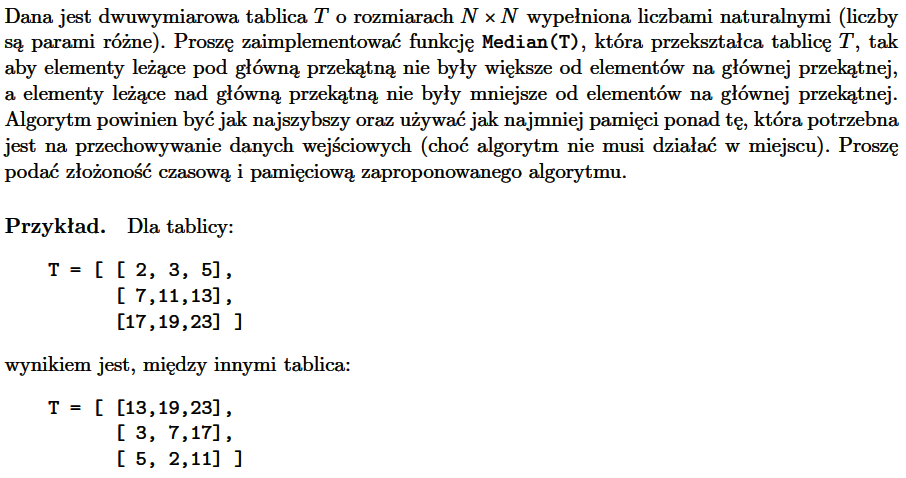

### Testy

##### Testy dostarczone wraz z zadaniem

In [1]:
T1 = [[1, 2], [3, 4]]
T2 = [[2, 3, 5], [7, 11, 13], [17, 19, 23]]
T3 = [[2, 5, 2, 5], [2, 5, 5, 2], [2, 5, 2, 2], [2, 5, 5, 5]]
T4 = [[43, 74, 53, 97], [80, 61, 61, 19], [61, 73, 89, 93], [42, 17, 89, 80]]

TESTS = [T1, T2, T3, T4]


def isok(T):
    N = len(T)
    for r in range(1, N):
        for c in range(r):
            for d in range(N):
                if T[r][c] > T[d][d]: return False
                if T[c][r] < T[d][d]: return False
    return True


def printT(T):
    N = len(T)
    for row in T: print(row)
    print()


def runtests(f):
    OK = True
    for T in TESTS:
        print("----------------------")
        print("Dane:")
        printT(T)
        f(T)
        print("Wynik:")
        printT(T)

        if not isok(T):
            print("Blad!")
            OK = False
    print("----------------------")

    if OK:
        print("OK!")
    else:
        print("Bledy!")

##### Moje własne testy

In [2]:
import random
from collections import defaultdict


def random_matrix(n, range_=(0, 100)):
    return [[random.randint(*range_) for _ in range(n)] for _ in range(n)]


def random_tests(fn, size=(1, 20), range_=(0, 100), samples=10):
    passed = 0
    for i in range(1, samples + 1):
        n = random.randint(*size)
        matrix = random_matrix(n, range_)
        init_counts = defaultdict(int)
        for row in matrix:
            for val in row:
                init_counts[val] += 1
        print(f'===== Test #{i}: =====')
        print(f'Input array ({n} x {n}):')
        print(*matrix, sep='\n', end='\n\n')
        fn(matrix)
        final_counts = defaultdict(int)
        for row in matrix:
            for val in row:
                final_counts[val] += 1
        no_dropped_values = init_counts == final_counts
        is_correct = isok(matrix) and no_dropped_values
        passed += is_correct
        print('Result array:')
        print(*matrix, sep='\n', end='\n\n')
        print('Is correct?:', is_correct)
        if not is_correct:
            print('Dropped values?:', not no_dropped_values)
        print(f'Tests already passed: {passed}/{i}', end='\n\n\n')
    print('\n===== Final results: =====')
    print(f'Total tests passed: {passed}/{samples}')

# I Sposób
### Z iteracją po skosie i wykorzystaniem fejkowej indeksacji

###### W takiej kolejności, w jakiej zostały zaznaczone indeksy kolejnymi numerami, indeksujemy tablicę 2-wymiarową. 
Oczywiście nie da się (lub nie jest to łatwe) stworzyć funkcji, która w czasie stałym zwróci indeks wskazanego elementu tablicy 2-wymiarowej, interpretowanej jako tablica 1-wymiarowa (linearyzacja tablicy), w taki sposób, że indeks będzie odpowiadał kolejnemu elementowi po przekątnej. Z tego powodu używamy zmiennych, które imitują indeksy, na których znajdowalibyśmy się, gdyby kolejno odwiedzane przez nas elementy znajdowałyby się w tablicy 1-wymiarowej.
###### Kolejno odwiedzane pola:

    +----+----+----+----+----+
    | 14 | 18 | 21 | 23 | 24 |
    +----+----+----+----+----+
    |  9 | 13 | 17 | 20 | 22 |
    +----+----+----+----+----+
    |  5 |  8 | 12 | 16 | 19 |
    +----+----+----+----+----+
    |  2 |  4 |  7 | 11 | 15 |
    +----+----+----+----+----+
    |  0 |  1 |  3 |  6 | 10 |
    +----+----+----+----+----+

Mając już ustalony sposób indeksowania tablicy, możemy zmodyfikować algorytm Quick Select w taki sposób, aby wyznaczyć element, którego finalną pozycją jest początek przekątnej oraz element, który finalnie znajdzie się na końcu przekątnej głównej. Algorytm Quick Select ustawi ten element (pivota) na odpowiedniej pozycji, powodując, że wszystkie znajdujące się przed nim elementy będą nie większe niż ten element, a wszystkie kolejne - większe od niego. Dzięki temu, że indeksujemy w wyżej omówiony sposób, wystarczy skorzystać z przerobionego Quick Selecta do wybrania elementu o indeksie 10 (ogólnie: $ \frac{n^2 - n}{2} $, gdzie $ n $ - rozmiar kwadratowej tablicy), a następnie, wybrania elementu o indeksie 14 (ogólnie: $ \frac{n^2 - n}{2} + n - 1 $).

### Implementacja algorytmu

In [3]:
def get_next_indices(row_idx, col_idx, n) -> ('row_idx', 'col_idx'):
    if row_idx == 0: return n - col_idx - 2, n - 1
    if col_idx == 0: return n - 1, n - row_idx
    return row_idx - 1, col_idx - 1


def get_prev_indices(row_idx, col_idx, n) -> ('row_idx', 'col_idx'):
    if row_idx == n - 1: return n - col_idx, 0
    if col_idx == n - 1: return 0, n - row_idx - 2
    return row_idx + 1, col_idx + 1


def partition(arr, row_idx, col_idx, fake_idx, end_idx):
    n = len(arr)
    begin_row_idx = row_idx
    begin_col_idx = col_idx
    pivot = arr[row_idx][col_idx]
    pivot_idx = fake_idx
    
    fake_idx += 1
    row_idx, col_idx = get_next_indices(row_idx, col_idx, n)
    swap_row_idx = row_idx
    swap_col_idx = col_idx
    
    while fake_idx <= end_idx:
        if arr[row_idx][col_idx] <= pivot:
            pivot_idx += 1
            swap(arr, row_idx, col_idx, swap_row_idx, swap_col_idx)
            swap_row_idx, swap_col_idx = get_next_indices(swap_row_idx, swap_col_idx, n)
        fake_idx += 1
        row_idx, col_idx = get_next_indices(row_idx, col_idx, n)
                
    swap_row_idx, swap_col_idx = get_prev_indices(swap_row_idx, swap_col_idx, n)
    swap(arr, swap_row_idx, swap_col_idx, begin_row_idx, begin_col_idx)
        
    return pivot_idx, swap_row_idx, swap_col_idx


def swap(arr, x1, y1, x2, y2):
    arr[x1][y1], arr[x2][y2] = arr[x2][y2], arr[x1][y1]
    
    
def _quick_select(arr, begin_row_idx, begin_col_idx, fake_idx, end_idx, k):
    n = len(arr)
    while True:
        pivot_fake_idx, pivot_row_idx, pivot_col_idx = partition( 
                        arr, begin_row_idx, begin_col_idx, fake_idx, end_idx)
        
        if pivot_fake_idx < k:
            begin_row_idx, begin_col_idx = get_next_indices(pivot_row_idx, pivot_col_idx, n)
            fake_idx = pivot_fake_idx + 1
        elif pivot_fake_idx > k:
            end_idx = pivot_fake_idx - 1
        else:
            return arr[pivot_row_idx][pivot_col_idx]
        

def quick_select(arr, k):
    n = len(arr)
    return _quick_select(arr, n-1, 0, 0, n**2 - 1, k)


def Median(T):
    n = len(T)
    first_median_idx = (n**2 - n) // 2
    last_median_idx = first_median_idx + n - 1
    quick_select(T, first_median_idx)
    quick_select(T, last_median_idx)

Kilka testów

In [4]:
runtests(Median)

----------------------
Dane:
[1, 2]
[3, 4]

Wynik:
[3, 4]
[1, 2]

----------------------
Dane:
[2, 3, 5]
[7, 11, 13]
[17, 19, 23]

Wynik:
[13, 23, 19]
[5, 11, 17]
[2, 3, 7]

----------------------
Dane:
[2, 5, 2, 5]
[2, 5, 5, 2]
[2, 5, 2, 2]
[2, 5, 5, 5]

Wynik:
[5, 5, 5, 5]
[2, 5, 5, 5]
[2, 2, 2, 5]
[2, 2, 2, 2]

----------------------
Dane:
[43, 74, 53, 97]
[80, 61, 61, 19]
[61, 73, 89, 93]
[42, 17, 89, 80]

Wynik:
[74, 89, 93, 97]
[61, 73, 80, 89]
[42, 53, 61, 80]
[17, 19, 43, 61]

----------------------
OK!


In [5]:
random_tests(Median, samples=25, size=(1, 25))

===== Test #1: =====
Input array (4 x 4):
[100, 58, 10, 65]
[73, 61, 12, 0]
[4, 26, 70, 20]
[28, 19, 45, 89]

Result array:
[58, 100, 70, 65]
[20, 45, 73, 89]
[10, 19, 28, 61]
[0, 4, 12, 26]

Is correct?: True
Tests already passed: 1/1


===== Test #2: =====
Input array (11 x 11):
[71, 2, 66, 45, 96, 71, 50, 16, 4, 4, 57]
[66, 76, 15, 87, 88, 30, 61, 15, 83, 86, 58]
[57, 94, 65, 90, 59, 60, 44, 99, 64, 5, 45]
[84, 41, 42, 42, 97, 68, 13, 54, 14, 81, 88]
[34, 6, 42, 0, 29, 92, 6, 75, 19, 26, 49]
[81, 14, 33, 58, 74, 11, 71, 47, 42, 99, 7]
[53, 84, 91, 28, 6, 19, 69, 3, 43, 1, 19]
[48, 15, 86, 53, 98, 85, 92, 26, 87, 34, 100]
[11, 87, 63, 65, 79, 17, 13, 79, 3, 51, 31]
[65, 33, 0, 14, 33, 55, 24, 1, 58, 52, 75]
[99, 30, 30, 83, 100, 96, 32, 46, 26, 94, 68]

Result array:
[57, 65, 92, 99, 84, 81, 65, 86, 85, 100, 100]
[46, 55, 65, 66, 81, 87, 79, 88, 71, 58, 99]
[42, 45, 54, 58, 87, 98, 96, 71, 91, 76, 75]
[26, 43, 34, 53, 90, 59, 88, 63, 61, 83, 83]
[19, 30, 33, 34, 51, 97, 68, 60, 68, 9

##### Dodatkowo: Sortowanie macierzy po skosie (wystarczy trochę zmodyfikować powyższy algorytm)

In [6]:
def _quick_sort(arr, begin_row_idx, begin_col_idx, fake_idx, end_idx):
    n = len(arr)
    while fake_idx < end_idx:
        pivot_fake_idx, pivot_row_idx, pivot_col_idx = partition( 
                        arr, begin_row_idx, begin_col_idx, fake_idx, end_idx)
        
        if pivot_fake_idx - fake_idx < end_idx - pivot_fake_idx:
            _quick_sort(arr, begin_row_idx, begin_col_idx, fake_idx, pivot_fake_idx - 1)
            fake_idx = pivot_fake_idx + 1
            begin_row_idx, begin_col_idx = get_next_indices(pivot_row_idx, pivot_col_idx, n)
        else:
            next_row_idx, next_col_idx = get_next_indices(pivot_row_idx, pivot_col_idx, n)
            _quick_sort(arr, next_row_idx, next_col_idx, pivot_fake_idx + 1, end_idx)
            end_idx = pivot_fake_idx - 1
        

def quick_sort(arr):
    n = len(arr)
    return _quick_sort(arr, n-1, 0, 0, n**2 - 1)

Kilka testów

In [7]:
matrix = random_matrix(3, range_=(0, 9))
print('Input matrix:')
print(*matrix, sep='\n', end='\n\n')
print('Sorted matrix:')
quick_sort(matrix)
print(*matrix, sep='\n', end='\n\n')

Input matrix:
[3, 4, 4]
[1, 1, 2]
[4, 1, 0]

Sorted matrix:
[3, 4, 4]
[1, 2, 4]
[0, 1, 1]



In [8]:
matrix = random_matrix(10)
print('Input matrix:')
print(*matrix, sep='\n', end='\n\n')
print('Sorted matrix:')
quick_sort(matrix)
print(*matrix, sep='\n', end='\n\n')

Input matrix:
[55, 57, 98, 28, 42, 6, 76, 36, 19, 54]
[28, 57, 31, 32, 99, 11, 28, 7, 95, 7]
[53, 87, 14, 4, 91, 80, 86, 63, 34, 17]
[29, 74, 17, 91, 29, 99, 78, 81, 77, 26]
[12, 72, 86, 61, 60, 16, 16, 37, 46, 78]
[74, 34, 19, 51, 90, 8, 43, 75, 3, 51]
[87, 2, 21, 6, 92, 39, 24, 55, 11, 59]
[19, 78, 44, 82, 53, 46, 31, 97, 41, 80]
[68, 43, 32, 4, 63, 91, 2, 21, 28, 42]
[19, 37, 11, 61, 42, 34, 9, 57, 68, 32]

Sorted matrix:
[46, 57, 68, 77, 81, 87, 91, 97, 99, 99]
[37, 46, 57, 63, 76, 80, 87, 91, 95, 98]
[31, 37, 44, 55, 63, 75, 80, 86, 91, 92]
[26, 31, 36, 43, 55, 61, 74, 78, 86, 90]
[19, 24, 29, 34, 43, 54, 61, 74, 78, 82]
[12, 17, 21, 29, 34, 42, 53, 60, 72, 78]
[8, 11, 17, 21, 28, 34, 42, 53, 59, 68]
[6, 7, 11, 16, 19, 28, 32, 42, 51, 57]
[3, 4, 7, 11, 16, 19, 28, 32, 41, 51]
[2, 2, 4, 6, 9, 14, 19, 28, 32, 39]



# II Sposób
### Z wykorzystaniem indeksowania tablicy poprzez podział na obszary: pod przekątną, na przekątnej i nad przekątną.

   ### Omówienie algorytmu

###### Dla tablicy $ n \times n $, gdzie $ n $ - liczba parzysta:
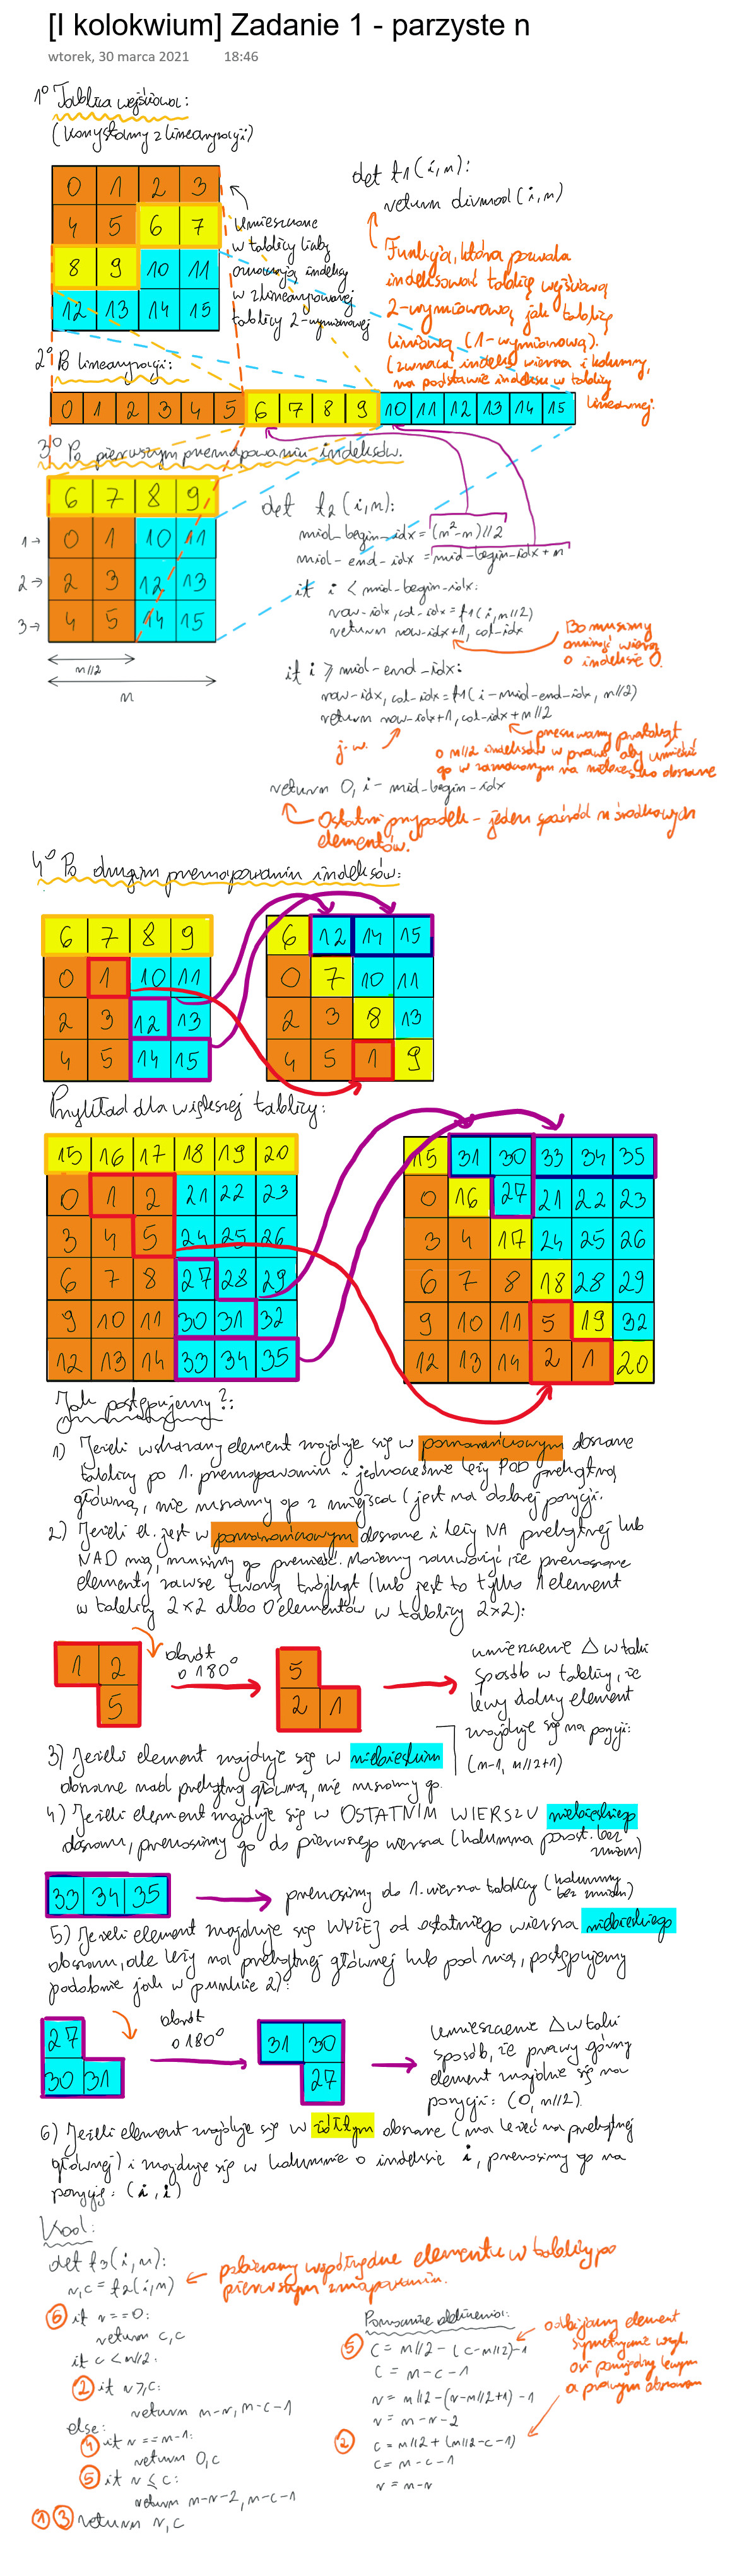

###### Dla tablicy $ n \times n $, gdzie $ n $ - liczba nieparzysta:
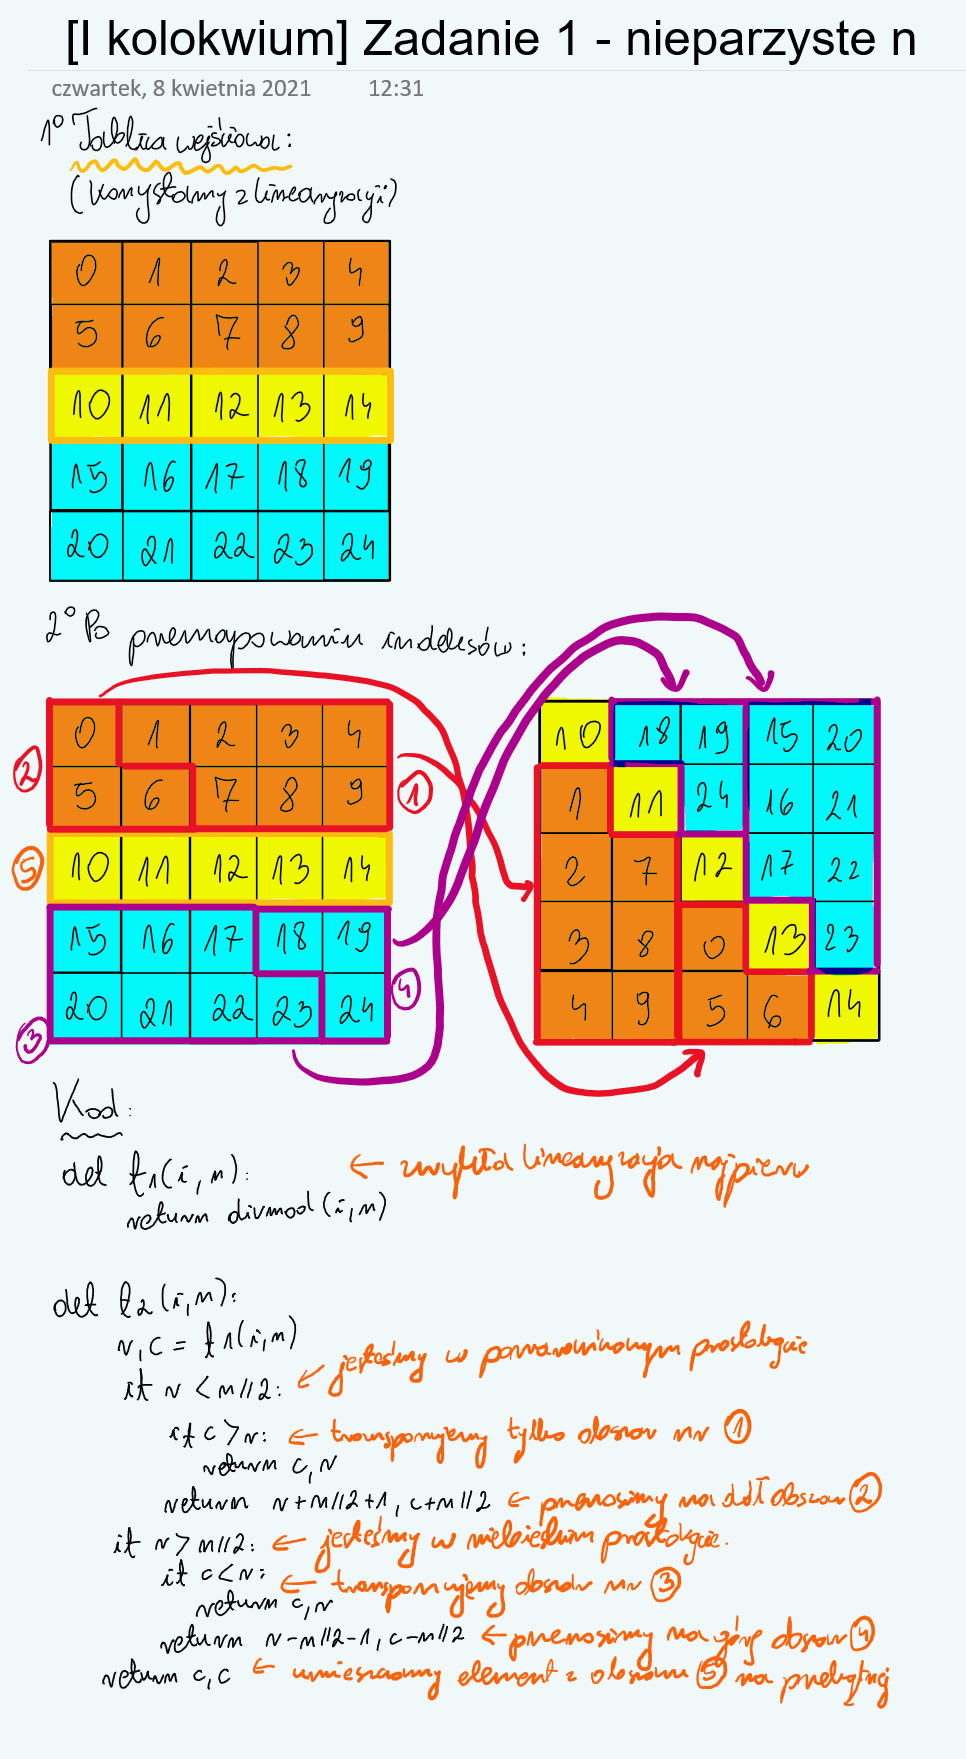

### Implementacja algorytmu

##### Implementacja klasy do indeksowania tablicy

In [9]:
def process_idx(method):
    def inner(obj, idx, *args, **kwargs):
        if idx < 0 :
            idx += len(obj)
        if not 0 <= idx < len(obj):
            raise IndexError(f'{obj.__class__.__name__} index out of range')
        return method(obj, idx, *args, **kwargs)
    return inner
    

class MedianMatrix:
    def __init__(self, matrix):
        self.matrix = matrix
        self.n = len(matrix)
        self.length = self.n ** 2
        # If a matrix has odd number of elements
        if self.n % 2:
            self.get_indices = lambda idx: self.map_indices_odd_diagonal(idx, self.n)
        # If a matrix has even number of elements
        else:
            self.get_indices = lambda idx: self.map_indices_even_diagonal(idx, self.n)
        
    def __len__(self):
        return self.length
    
    @process_idx
    def __getitem__(self, idx):
        r, c = self.get_indices(idx)
        return self.matrix[r][c]
    
    @process_idx
    def __setitem__(self, idx, val):
        r, c = self.get_indices(idx)
        self.matrix[r][c] = val

    @staticmethod
    def linearize(i, n):
        """
        Returns index of a row and a column in a linearized 2D square matrix of size n.
        """
        return divmod(i, n)

    def map_indices_even_areas(self, i, n):
        """
        Divides 2D matrix into areas of elements from the middle of a linearized matrix,
        elements before the middle and elements after the middle ones.
        A - an area of elements placed before the n middle elements
        B - an area (a row) of the n elements from the middle of a linearized matrix.
        C - an area of elements placed after the n middle elements.

        We interpret a matrix as a linear array in such a way:
        [ | | | | | | ... | | | | | | | ... | | | | | | | ]
         \_______ A _______/ \__ B __/ \_______ C _______/

        Elements counts are as follows:
        |B| = n
        |A| = |C| = (n^2 - n) / 2

        The output matrix will be divided into such areas:
        +---------------+
        |       B       |
        +-------+-------+
        |       |       |
        |       |       |
        |   A   |   C   |
        |       |       |
        |       |       |
        +-------+-------+
        """
        mid_begin_idx = (n**2 - n) // 2
        mid_end_idx = mid_begin_idx + n

        # If an element is before the n middle elements, place it in the A area
        if i < mid_begin_idx:
            row_idx, col_idx = self.linearize(i, n // 2)
            return row_idx + 1, col_idx
        # If an element is after the n middle elements, place it in the C area
        if i >= mid_end_idx:
            row_idx, col_idx = self.linearize(i - mid_end_idx, n // 2)
            return row_idx + 1, col_idx + n // 2
        # If one of the n elements in the middle, place it in the B area
        return 0, i - mid_begin_idx

    def map_indices_even_diagonal(self, i, n):
        """
        This function maps the areas of the matrix as follows:
        +---------------+          +---+-----------+  
        |       B       |          | B |           |  
        +-------+-------+          +---+---+   C   |
        |       |       |          |   | B |       |  
        |       |       |   --->   |   +---+---+   |
        |   A   |   C   |          |       | B |   |  
        |       |       |          |   A   +---+---+
        |       |       |          |           | B |  
        +-------+-------+          +-----------+---+

        A - an area of elements placed before the n middle elements
        B - an area (a row) of the n elements from the middle of a linearized matrix.
        C - an area of elements placed after the n middle elements.
        """
        r, c = self.map_indices_even_areas(i, n)
        # Place an element from the B area on a diagonal
        if r == 0: 
            return c, c
        # Place elements from the A area which are lying on or above 
        # a diagonal in a proper area below this diagonal
        if c < n // 2:
            if c >= r: 
                return n - r, n - c - 1
        # Place elements from the B area which are lying on or below
        # a diagonal in a proper area above this diagonal
        else:
            if r == n - 1:
                return 0, c
            if c <= r:
                return n - r - 2, n - c - 1
        # Else return the current position of an item as it is placed correctly
        return r, c

    def map_indices_odd_diagonal(self, i, n):
        """
        Maps a 2D matrix in such a way that n elements from the middle of a linearized
        matrix are placed on a diagonal, elements lying later a- above and elements lying
        before the n middle elements - below a diagonal.
        A - an area of elements placed before the n middle elements
        B - an area (a row) of the n elements from the middle of a linearized matrix.
        C - an area of elements placed after the n middle elements.

        We interpret a matrix as a linear array in such a way:
        [ | | | | | | ... | | | | | | | ... | | | | | | | ]
         \_______ A _______/ \__ B __/ \_______ C _______/

        Elements counts are as follows:
        |B| = n
        |A| = |C| = (n^2 - n) / 2

        We can observe that such areas correspond to the areas of a matrix as shown in the
        matrix on the left side below. A function will map a matrix as follows:
        +---------------+          +---+---------------+
        |               |          | B |               |   
        |       A       |          +---+---+      C    |
        |               |          |   | B |           |
        +---------------+          |   +---+---+       |
        |       B       |   --->   |       | B |       |
        +---------------+          |       +---+---+   |
        |               |          |           | B |   |
        |       C       |          |    A      +---+---+
        |               |          |               | B |
        +---------------+          +---------------+---+
        """
        r, c = self.linearize(i, n)
        # If an element is placed in the A area
        if r < n // 2:
            # If an element is above a diagonal, transpose this element
            if c > r:
                return c, r
            # Else move an element to the right position below a diagonal
            return r + n // 2 + 1, c + n // 2
        # If an element is placed in the C area
        if r > n // 2:
            # If an element is below a diagonal, transpose this element
            if c < r:
                return c, r
            # Else move an element to the right position above a diagonal
            return r - n // 2 - 1, c - n // 2
        # If an element is placed in the B area, place it on a diagonal
        return c, c    

##### Implementacja algorytmu

Możemy użyć już najzwyklejszego Quick Selecta, ponieważ klasa umożliwia nam indeksowanie tablicy, podzielonej na odpowiednie obszary, w taki sam sposób, w jaki byśmy indeksowali tablicę 1-wymiarową.

In [10]:
def quick_select(arr, k: 'index of a value'):
    if not 0 <= k < len(arr):
        raise IndexError(f'index too {"small" if k < 0 else "large"}')
    if len(arr) == 1:
        return arr[0]
    return _quick_select(arr, k, 0, len(arr)-1)
    
    
def _quick_select(arr, k, left_idx, right_idx):
    pivot_position = _partition(arr, left_idx, right_idx)
    
    if pivot_position > k:
        return _quick_select(arr, k, left_idx, pivot_position - 1)
    elif pivot_position < k:
        return _quick_select(arr, k, pivot_position + 1, right_idx)
    else:
        return arr[pivot_position]
        
        
def _partition(arr, left_idx, right_idx):
    pivot = arr[right_idx]
    
    # Partition an array into 2 subarrays of elements lower than or
    # equal to a pivot and of elements greater than a pivot
    i = left_idx
    for j in range(left_idx, right_idx):
        if arr[j] < pivot:
            swap(arr, i, j)
            i += 1
    
    # Place a pivot element on its destination index
    swap(arr, i, right_idx)
    
    return i  # Return a pivot position after the last swap

    
def swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]
    
    
def Median2(T):
    arr = MedianMatrix(T)
    # Select the first and the last median in order to place all elements lower
    # than the first median before this median and greater than the last median 
    # after this last median
    n = len(T)
    first_median_idx = (n**2 - n) // 2
    last_median_idx = first_median_idx + n - 1
    quick_select(arr, first_median_idx)
    quick_select(arr, last_median_idx)

Kilka testów

In [11]:
runtests(Median2)

----------------------
Dane:
[3, 4]
[1, 2]

Wynik:
[2, 4]
[1, 3]

----------------------
Dane:
[13, 23, 19]
[5, 11, 17]
[2, 3, 7]

Wynik:
[7, 23, 17]
[5, 11, 19]
[2, 3, 13]

----------------------
Dane:
[5, 5, 5, 5]
[2, 5, 5, 5]
[2, 2, 2, 5]
[2, 2, 2, 2]

Wynik:
[2, 5, 5, 5]
[2, 2, 5, 5]
[2, 2, 5, 5]
[2, 2, 2, 5]

----------------------
Dane:
[74, 89, 93, 97]
[61, 73, 80, 89]
[42, 53, 61, 80]
[17, 19, 43, 61]

Wynik:
[61, 89, 93, 97]
[43, 73, 80, 89]
[53, 17, 61, 80]
[19, 61, 42, 74]

----------------------
OK!


In [12]:
random_tests(Median2, samples=25, size=(1, 25))

===== Test #1: =====
Input array (2 x 2):
[22, 6]
[41, 35]

Result array:
[22, 41]
[6, 35]

Is correct?: True
Tests already passed: 1/1


===== Test #2: =====
Input array (14 x 14):
[27, 15, 62, 91, 28, 38, 50, 4, 57, 32, 21, 49, 29, 0]
[63, 98, 64, 83, 79, 93, 44, 28, 22, 85, 55, 90, 69, 28]
[32, 68, 63, 59, 37, 41, 28, 41, 35, 54, 86, 52, 1, 72]
[10, 58, 6, 83, 32, 33, 20, 100, 78, 29, 80, 6, 49, 15]
[63, 15, 51, 17, 43, 13, 5, 79, 82, 80, 95, 95, 42, 64]
[36, 9, 8, 48, 21, 11, 20, 92, 97, 94, 37, 12, 90, 15]
[75, 20, 62, 98, 83, 58, 100, 72, 75, 87, 13, 31, 16, 33]
[72, 17, 58, 27, 20, 65, 23, 1, 5, 96, 91, 22, 84, 80]
[14, 49, 53, 64, 62, 1, 81, 28, 9, 57, 92, 80, 71, 20]
[31, 30, 2, 81, 29, 30, 15, 5, 97, 41, 18, 86, 8, 8]
[99, 46, 96, 36, 90, 51, 86, 100, 21, 71, 15, 75, 73, 46]
[75, 83, 95, 40, 79, 74, 52, 67, 66, 69, 27, 9, 46, 100]
[50, 70, 1, 76, 50, 94, 45, 32, 83, 88, 21, 44, 27, 31]
[47, 26, 87, 28, 14, 37, 53, 23, 93, 35, 47, 51, 91, 33]

Result array:
[46, 82, 95, 91, 83

Result array:
[47, 97, 94, 91, 90, 94, 92, 98, 99, 91, 98, 96, 97, 90, 90, 96, 97, 92]
[6, 48, 97, 93, 98, 91, 92, 94, 98, 51, 52, 53, 53, 53, 53, 54, 55, 55]
[1, 17, 48, 90, 99, 93, 95, 92, 95, 56, 55, 55, 56, 55, 57, 58, 57, 57]
[34, 11, 18, 48, 91, 88, 86, 87, 86, 57, 59, 59, 59, 59, 59, 60, 65, 66]
[5, 3, 12, 31, 48, 86, 85, 85, 84, 64, 66, 61, 66, 65, 63, 65, 60, 64]
[8, 34, 16, 21, 35, 48, 83, 77, 79, 62, 62, 66, 65, 64, 60, 61, 64, 63]
[19, 17, 16, 34, 33, 16, 49, 80, 77, 67, 67, 67, 68, 67, 67, 67, 69, 71]
[36, 32, 7, 8, 11, 3, 5, 49, 77, 71, 70, 71, 70, 71, 71, 73, 69, 70]
[6, 24, 2, 4, 36, 32, 35, 24, 49, 72, 72, 74, 75, 80, 76, 74, 82, 75]
[8, 3, 37, 12, 27, 14, 34, 34, 35, 49, 79, 74, 78, 77, 81, 80, 75, 82]
[22, 34, 34, 22, 4, 23, 36, 25, 35, 36, 50, 76, 78, 74, 76, 80, 81, 82]
[29, 27, 16, 6, 21, 36, 28, 34, 33, 33, 29, 50, 83, 83, 83, 83, 83, 84]
[18, 4, 35, 26, 4, 27, 27, 33, 31, 11, 21, 5, 50, 87, 87, 87, 87, 86]
[5, 36, 8, 35, 17, 21, 38, 39, 38, 25, 5, 23, 22, 50, 90

Result array:
[48, 53, 53, 53, 56, 54, 56, 54, 54, 57, 57, 57, 53, 57, 61, 63, 71, 74, 82, 89, 90, 91, 98]
[8, 48, 59, 59, 59, 58, 67, 62, 60, 63, 62, 62, 54, 58, 64, 59, 72, 74, 90, 81, 84, 93, 97]
[11, 7, 48, 61, 66, 66, 61, 60, 65, 63, 64, 67, 53, 61, 63, 68, 72, 73, 90, 80, 81, 98, 97]
[0, 9, 7, 48, 70, 70, 70, 71, 71, 71, 71, 71, 54, 63, 67, 69, 72, 75, 82, 84, 85, 96, 93]
[5, 12, 1, 15, 48, 74, 76, 75, 74, 75, 74, 75, 54, 63, 60, 69, 72, 75, 82, 80, 82, 100, 96]
[1, 1, 8, 17, 18, 49, 79, 78, 77, 78, 80, 86, 54, 66, 63, 69, 72, 73, 85, 86, 87, 95, 97]
[9, 1, 5, 15, 17, 20, 50, 85, 81, 85, 86, 83, 53, 67, 61, 68, 72, 76, 83, 87, 84, 94, 98]
[2, 5, 2, 19, 18, 20, 23, 49, 81, 81, 90, 83, 55, 59, 64, 68, 73, 74, 83, 83, 84, 97, 97]
[2, 1, 0, 15, 15, 21, 20, 32, 50, 92, 92, 91, 53, 59, 64, 68, 74, 77, 84, 82, 82, 93, 96]
[10, 5, 1, 16, 17, 22, 20, 36, 38, 49, 94, 100, 54, 64, 59, 69, 73, 79, 83, 90, 90, 99, 97]
[5, 10, 9, 18, 18, 27, 20, 41, 36, 38, 50, 99, 55, 58, 62, 68, 73, 77, 81, 

##### Troubleshooting

In [13]:
n = 4
a = [list(range(i, i+n)) for i in range(0, n**2, n)]
print('Input matrix:', *a, sep='\n', end='\n\n')
arr = MedianMatrix(a)
b = [[None]*n for _ in range(n)]
for i in range(0, n**2, n):
    for j in range(i, i+n):
        r, c = arr.map_indices_even_areas(j, n)
        b[r][c] = j
print('Mapped to areas:', *b, sep='\n', end='\n\n')
d = [[None]*n for _ in range(n)]
for i in range(0, n**2, n):
    for j in range(i, i+n):
        r, c = arr.map_indices_even_diagonal(j, n)
        d[r][c] = j
print('Mapped to diagonal:', *d, sep='\n', end='\n\n')

Input matrix:
[0, 1, 2, 3]
[4, 5, 6, 7]
[8, 9, 10, 11]
[12, 13, 14, 15]

Mapped to areas:
[6, 7, 8, 9]
[0, 1, 10, 11]
[2, 3, 12, 13]
[4, 5, 14, 15]

Mapped to diagonal:
[6, 12, 14, 15]
[0, 7, 10, 11]
[2, 3, 8, 13]
[4, 5, 1, 9]



In [14]:
[arr.map_indices_even_areas(i, n) for i in range(6, 10)]

[(0, 0), (0, 1), (0, 2), (0, 3)]